In [1]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import sample 
import scanpy as sc
import seaborn as sns
import anndata as ad
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')

the value of the environment variable BASIC_DCT_BACKEND is not in ["JAX","SCIPY"]


In [2]:
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/A1-1'
name_anndata = 'anndataNucA11_all_0threshold_shape_distances'
anndata = sc.read(OUTPUT_DIR + '/' + name_anndata) # get original anndata after Sparrow

In [3]:
annotation = 'annotation_own_score_genes_BasicMartin_12'

In [4]:
cell_types_thesis_7 = ['Hepatocyte','Endothelial cell','Stromal cell','B cell','Kupffer cell','Cholangiocyte','Other immune cell']
cell_types_thesis_12 = ['Hepatocyte','PVEC','CVEC','LSEC','Mesothelial cell','Fibroblast','Stellate cell','B cell','Kupffer cell','Cholangiocyte','Portal LAM','Other immune cell']
cell_types_thesis_all = cell_types_thesis_7 + cell_types_thesis_12
cell_types_thesis_all = list(dict.fromkeys(cell_types_thesis_all))

In [5]:
name_dict = {'Hepa':'Hepatocyte',
 'Endo':'Endothelial cell',
 'Strom':'Stromal cell',
 'B cell':'B cell',
 'Kupf':'Kupffer cell',
 'Chol':'Cholangiocyte',
 'Oth im':'Other immune cell',
 'Portal vein':'PVEC',
 'Central vein':'CVEC',
 'LSEC':'LSEC',
 'Meso':'Mesothelial cell',
 'Fibr':'Fibroblast',
 'Stel':'Stellate cell',
 'Portal LAM':'Portal LAM',
 'Unknown':'Unknown'}

In [6]:
# substitute values in anndata.obs[annotation] with the values in name_dict
keys = list(name_dict.keys())
for i in range(len(keys)):
    anndata.obs[annotation] = anndata.obs[annotation].replace(keys[i],name_dict[keys[i]])

In [7]:
color_dict_RESOLVE={'B cell': '#a4be5c', 
'Cholangiocyte': '#7f007f', 
'Hepatocyte': '#ff8c00', 
'Kupffer cell': '#ff0000', 
'LSEC': '#2a9df4',
'Mesothelial cell': '#7b3f00', 
'CVEC': '#0000cd', 
'PVEC': '#00ffff', 
'Other immune cell': '#2e8b57', 
'Fibroblast': '#ff1493',
'Stellate cell': '#ffea17', 
'Portal LAM': '#00fa9a', 
'Endothelial cell': '#c4d4e0', 
'Stromal cell': '#ffc9ed',
'unknown_celltype': '#696969', #dim gray
'Unknown': '#696969'} #dim gray

In [8]:
#light blue hexa code: #add8e6

In [9]:
# 'annotation_name' is the column in the anndata.obs with the annotation of the cells
colors=[color_dict_RESOLVE[i] for i in anndata.obs[annotation].astype('category').cat.categories]
anndata.uns[annotation+'_colors']=colors

In [26]:
anndata.obs['Unknown_annotation_own_score_genes_BasicMartin_12'] = anndata.obs['annotation_own_score_genes_BasicMartin_12'] 
anndata.obs['Unknown cells'] = np.where(anndata.obs['Unknown_annotation_own_score_genes_BasicMartin_12'] == 'Unknown','Unknown','Known')
# make categorical
anndata.obs['Unknown cells'] = anndata.obs['Unknown cells'].astype('category')
anndata.uns['Unknown cells_colors'] = ['#696969','#66ff00'] #dim gray, red

In [11]:
# get different values in anndata.obs[annotation]
values = anndata.obs[annotation].values.tolist()
values = set(values)
values = [elem for elem in values]
percentages = []
for i in values:
    percentages.append(round((anndata.obs[annotation] == i).sum()/len(anndata.obs[annotation])*100,2))
percentages
# create dict with value to value + percentage
value_dict = {}
for i in range(len(values)):
    value_dict[values[i]] = values[i] + ' (' + str(percentages[i]) + '%)'
keys = list(value_dict.keys())
for i in range(len(keys)):
    anndata.obs[annotation] = anndata.obs[annotation].replace(keys[i],value_dict[keys[i]])

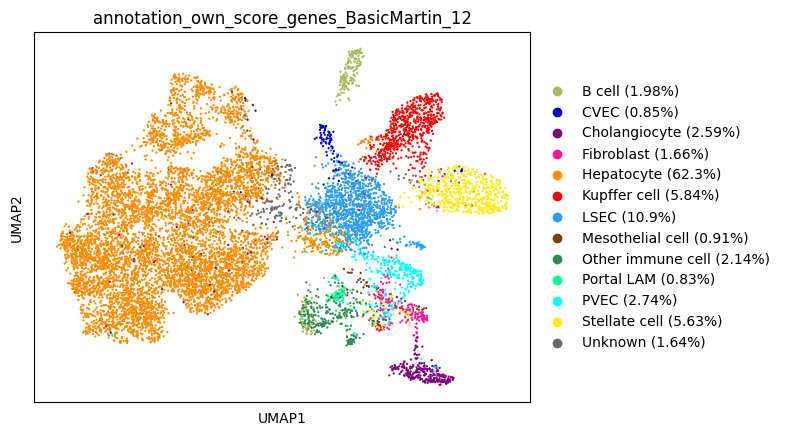

In [12]:
ax = sc.pl.umap(anndata,color=[annotation])

In [12]:
sdata = read_zarr( os.path.join(OUTPUT_DIR ,'sdata.zarr'))
del sdata.table
sdata.table = anndata

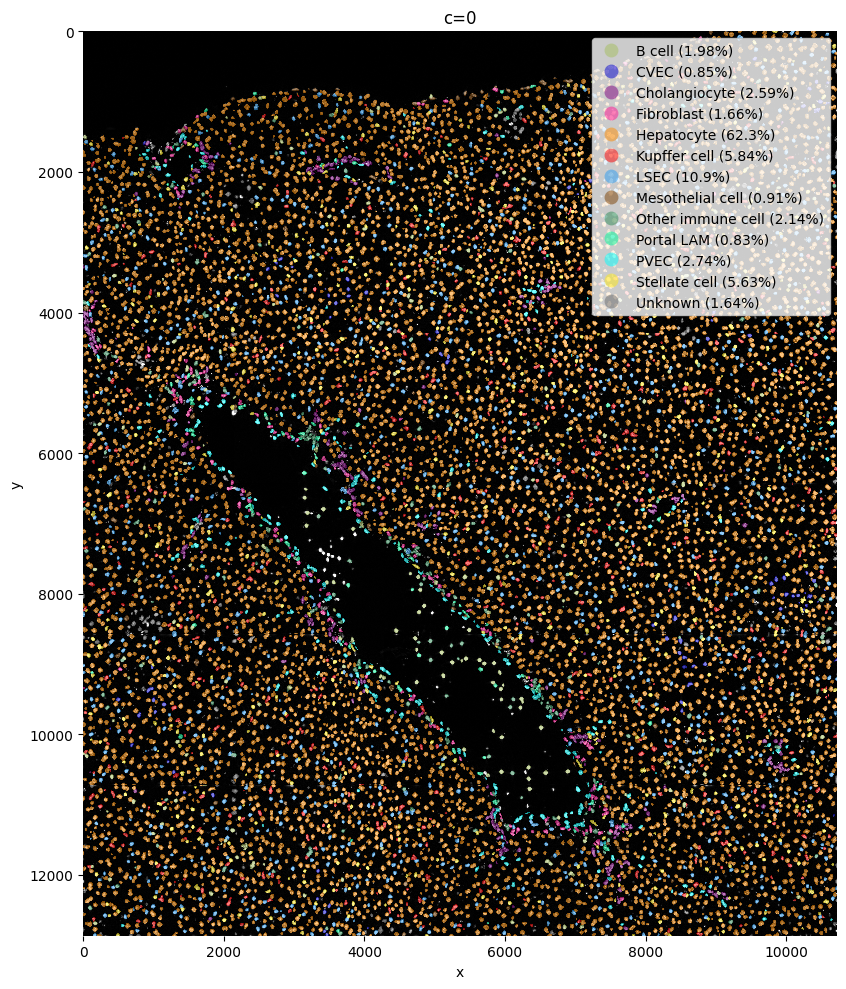

In [14]:
nas.pl.plot_shapes(sdata, column=annotation,img_layer='clahe' , shapes_layer='segmentation_mask_boundaries' )

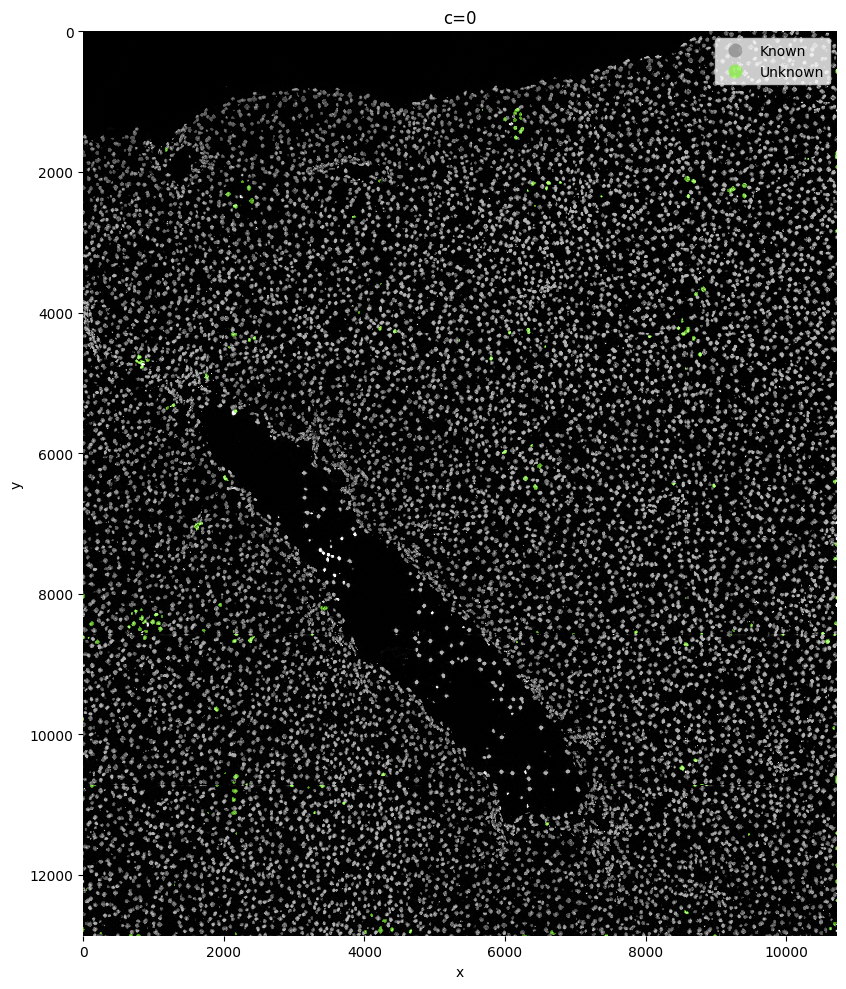

In [27]:
nas.pl.plot_shapes(sdata, column='Unknown cells',img_layer='clahe' , shapes_layer='segmentation_mask_boundaries')